# First Neurons

In [3]:
import numpy as np
import tensorflow as tf

** Set Random Seeds for same results **

In [7]:
np.random.seed(101)
tf.set_random_seed(101)

** Data Setup **

Setting Up some Random Data for Demonstration Purposes

In [8]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [9]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [10]:
# CONFIRM SAME  RANDOM NUMBERS (EXECUTE SEED IN SAME CELL!) Watch video for explanation
np.random.seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

### Placeholders

In [11]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [13]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)

### Running Sessions  to create Graphs with Feed Dictionaries

In [17]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


________________________

________________________

## Example Neural Network

In [1]:
n_features = 10
n_dense_neurons = 3

In [4]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [5]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

** Operation Activation Function **

In [22]:
xW = tf.matmul(x,W)

In [23]:
z = tf.add(xW,b)

In [24]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

** Variable Intializer! **

In [25]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [28]:
print(layer_out)

[[ 0.63504547  0.48962751  0.98692095]]


We still need to finish off this process with optimization! Let's learn how to do this next.

_____

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [6]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [7]:
x_data

array([ -1.20414455,   0.56564424,   1.82778721,   3.71206868,
         4.26475206,   5.10403018,   5.79550318,   9.07975903,
         9.63578763,  11.18097657])

In [8]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline

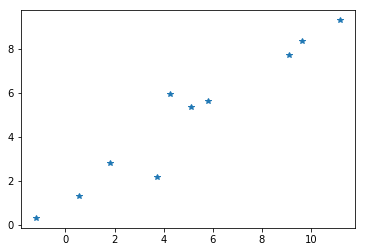

In [15]:
plt.plot(x_data,y_label,'*')

** Variables **

In [16]:
np.random.rand(2)

array([ 0.29220241,  0.84038402])

In [18]:
m = tf.Variable(0.29220241)
b = tf.Variable(0.84038402)

### Cost Function

In [19]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


### Optimizer

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [21]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [25]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 1
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [26]:
final_slope

0.68287283

In [27]:
final_intercept

0.89212286

### Evaluate Results

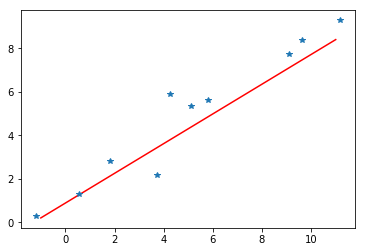

In [28]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

In [38]:
import collections

a = tf.constant([10, 20])
b = tf.constant([1.0, 2.0])
# 'fetches' can be a singleton
session = tf.InteractiveSession()
v = session.run(a)

print(v)
# v is the numpy array [10, 20]
# 'fetches' can be a list.
v = session.run([a, b])
print(v)
# v a Python list with 2 numpy arrays: the numpy array [10, 20] and the
# 1-D array [1.0, 2.0]
# 'fetches' can be arbitrary lists, tuples, namedtuple, dicts:
MyData = collections.namedtuple('MyData', ['a', 'b'])
v = session.run({'k1': MyData(a, b), 'k2': [b, a]})


print(v)
# v is a dict with
# v['k1'] is a MyData namedtuple with 'a' the numpy array [10, 20] and
# 'b' the numpy array [1.0, 2.0]
# v['k2'] is a list with the numpy array [1.0, 2.0] and the numpy array
# [10, 20].

[10 20]
[array([10, 20]), array([ 1.,  2.], dtype=float32)]
{'k1': MyData(a=array([10, 20]), b=array([ 1.,  2.], dtype=float32)), 'k2': [array([ 1.,  2.], dtype=float32), array([10, 20])]}


# Great Job!